In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#I imported the raw file
forbes = pd.read_csv('forbes_2022_billionaires.csv.zip')

Data profiling

In [56]:
forbes.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [57]:
forbes.isnull().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

In [58]:
#forbes[(forbes['age'].isnull())]

In [59]:
forbes.duplicated().sum()

0

In [60]:
forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [61]:
forbes.isnull().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

Data cleaning

In [62]:
# I deleted unnecessary columns
del forbes['bio']
del forbes['about']
del forbes['numberOfSiblings']
del forbes['title']
del forbes['philanthropyScore']
del forbes['state']
del forbes['residenceMsa']
del forbes['organization']

In [63]:
# I dropped the empty rows in these columns
forbes.dropna(subset = ['country'], inplace = True)
forbes.dropna(subset = ['city'], inplace = True)
forbes.dropna(subset = ['gender'], inplace = True)

In [64]:
# I filled empty rows in the age column with the mean age
a= forbes['age'].mean()
forbes['age'].fillna(a, inplace = True)

In [65]:
# I filled empty rows in the birthDate column with the mean birthDate
forbes['birthDate'] = pd.to_datetime(forbes['birthDate'])
b = forbes['birthDate'].mean()
forbes['birthDate'].fillna(b, inplace = True)

DATA ANALYSIS AND VISUALIZATION

In [66]:
# I sorted thebfinalWorth to show the networth of all the billionaires in an ascending order
C =forbes.sort_values('finalWorth', ascending = False).head(5)
C

,rank,personName,age,finalWorth,year,month,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Austin,United States,True,M,1971-06-28
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Seattle,United States,True,M,1964-01-12
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,Paris,France,False,M,1949-03-05
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Medina,United States,True,M,1955-10-28
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,True,M,1930-08-30


In [67]:
# I made a visualization of the 5 richest men and their networth
d = C.nlargest(5,['finalWorth'])
e = d['personName']
f = d['finalWorth']

Text(0.5, 1.0, 'Names of Top 5 billionaires and their Networth')

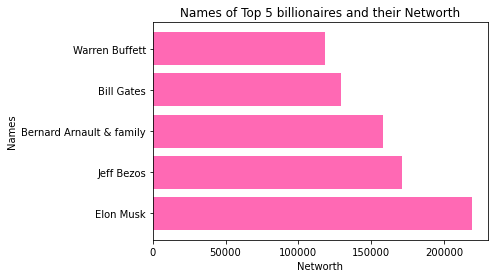

In [68]:
plt.barh(e,f, color ='hotpink')
plt.xlabel('Networth')
plt.ylabel('Names')
plt.title('Names of Top 5 billionaires and their Networth')

In [69]:
# I sorted for the countries of the 5 richest men and made a pie chart to depict it
l =d['country'].value_counts().head(5)
l

United States    4
France           1
Name: country, dtype: int64

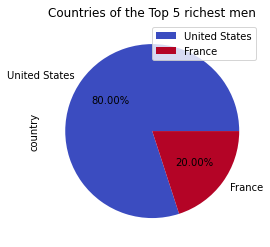

In [70]:
plt.title('Countries of the Top 5 richest men')
d['country'].value_counts().plot(kind = 'pie', cmap = 'coolwarm', autopct = '%.2f%%')
plt.legend()

In [71]:
#The top 5 poorest billionaires
g = forbes.nsmallest(5,['finalWorth'])
g

,rank,personName,age,finalWorth,year,month,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate
2577,2578,Krishna Kumar Bangur,61.0,1000.0,2022,4,Manufacturing,graphite electrodes,India,Kolkata,India,False,M,1960-07-02
2578,2578,"Wilbur 'Ed' Bosarge, Jr.",82.0,1000.0,2022,4,Finance & Investments,high speed trading,United States,Houston,United States,True,M,1939-07-28
2579,2578,Johanna Braun,42.0,1000.0,2022,4,Healthcare,medical technology,Germany,Melsungen,Germany,False,F,1980-01-01
2580,2578,Karl Friedrich Braun,39.0,1000.0,2022,4,Healthcare,medical technology,Germany,Melsungen,Germany,False,M,1983-01-01
2581,2578,Jean-Pierre Cayard,79.0,1000.0,2022,4,Food & Beverage,spirits,France,Paris,France,False,M,1943-01-01


In [72]:
#I sorted for the number of male and female billioniares and made a pie chart to depict it
j =forbes['gender'].value_counts()
j

M    2309
F     301
Name: gender, dtype: int64

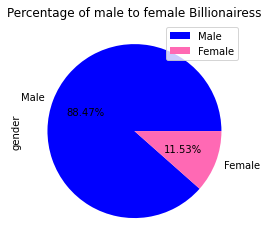

In [73]:
mylabel = ['Male',  'Female']
col = ['blue', 'hotpink']
forbes['gender'].value_counts().plot(kind= 'pie',autopct = '%.2f%%', colors = col , labels = mylabel, title='Percentage of male to female Billionairess')
plt.legend()

In [74]:
#I sorted for the number of slefmade and non-selfmade billioniares and made a pie chart to depict it
o =forbes['selfMade'].value_counts()
o

True     1859
False     751
Name: selfMade, dtype: int64

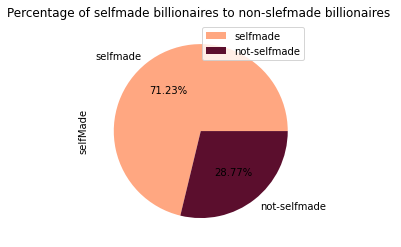

In [75]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade']
forbes['selfMade'].value_counts().plot(kind = 'pie',autopct = '%.2f%%', colors = col1, labels = mylabel1, title = 'Percentage of selfmade billionaires to non-slefmade billionaires ')
plt.legend()

In [76]:
# I subsetted for the numbers of billionaires per country
forbes['country'].value_counts().head(5)


United States     744
China             568
India             156
Germany           109
United Kingdom     82
Name: country, dtype: int64

In [77]:
forbes['country'].value_counts().tail(5)


Nepal       1
Tanzania    1
Bahrain     1
Greece      1
Cambodia    1
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with the highest number of billionaires')

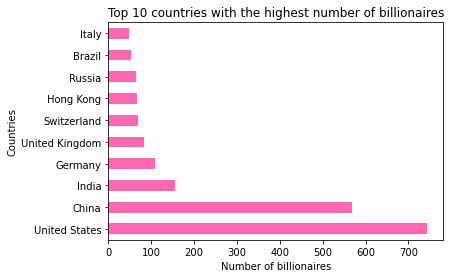

In [78]:
forbes['country'].value_counts().head(10).plot(kind = 'barh', color = 'hotpink')
plt.xlabel('Number of billionaires')
plt.ylabel('Countries')
plt.title('Top 10 countries with the highest number of billionaires')

In [79]:
# This shows the number of billionaires in each category
forbes['category'].value_counts()

Finance & Investments         381
Technology                    337
Manufacturing                 329
Fashion & Retail              242
Healthcare                    214
Food & Beverage               193
Real Estate                   191
Diversified                   178
Media & Entertainment          97
Energy                         95
Automotive                     68
Metals & Mining                66
Service                        53
Construction & Engineering     46
Telecom                        37
Logistics                      34
Sports                         26
Gambling & Casinos             23
Name: category, dtype: int64

In [80]:
# This shows the sum of money the billioniares in each category has in a descending orderhvkv 
forbes.groupby('category').sum()['finalWorth'].sort_values(ascending = False)


category
Technology                    2161700.0
Finance & Investments         1681200.0
Fashion & Retail              1549400.0
Manufacturing                 1080900.0
Food & Beverage                902550.0
Diversified                    900000.0
Healthcare                     707300.0
Real Estate                    681400.0
Automotive                     574700.0
Media & Entertainment          492600.0
Energy                         397300.0
Metals & Mining                386400.0
Telecom                        207100.0
Service                        188100.0
Logistics                      179400.0
Construction & Engineering     123900.0
Gambling & Casinos             107600.0
Sports                          97400.0
Name: finalWorth, dtype: float64

C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

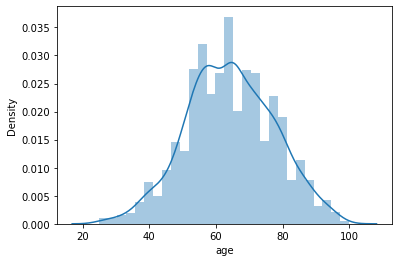

In [81]:
sns.distplot(forbes['age'])

In [ ]:
#The age of the youngest billionaire
forbes['age'].min()

In [ ]:
# The age of the oldest billionaire
forbes['age'].max()

In the following cells, i used sql to query data for details of the billionaires with a 10 year age interval
I tried to find the trend in the percentage of male and female billionaires and selfmade to non-aelf made billionaires

In [ ]:
forbes.to_csv('forbes_clean.csv')

In [119]:
aa= pd.read_csv('forbes_25_30.csv')
aa.rename(columns = {'MyUnknownColumn': 'sn'}, inplace = True)


In [120]:
# The number of billionaires betweeen age 25 and 30
aa['sn'].count()

14

In [121]:
# The numeber of selfmade and non-selfmade billionaires between the age 25-30
aao =aa['selfMade'].value_counts()
aao

True     9
False    5
Name: selfMade, dtype: int64

Text(0.5, 1.0, 'Percentage of selfmade billionaires to non-slefmade billionaires aged 25-30')

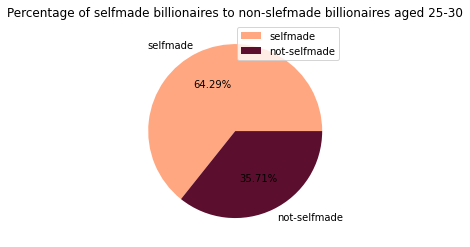

In [122]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade']
plt.pie(aao, colors = col1, labels = mylabel1,autopct = '%.2f%%')
plt.legend()
plt.title('Percentage of selfmade billionaires to non-slefmade billionaires aged 25-30')

In [124]:
# The number of male and female billionaires between the age 25 and 30
aaj =aa['gender'].value_counts()
aaj

M    12
F     2
Name: gender, dtype: int64

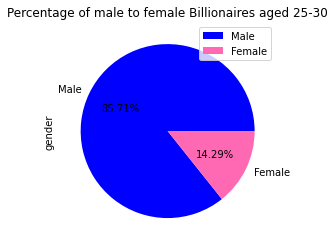

In [125]:
mylabel = ['Male',  'Female']
col = ['blue', 'hotpink']
aa['gender'].value_counts().plot(kind= 'pie',autopct = '%.2f%%', colors = col , labels = mylabel, title='Percentage of male to female Billionaires aged 25-30')
plt.legend()

In [84]:
ab = pd.read_csv('forbes_31_40.csv')
ab.rename(columns = {'MyUnknownColumn': 'sn'}, inplace = True)


91

In [126]:
# The number of billionaires between the age 31 and 40
ab['sn'].count()

91

In [127]:
# The number of  selfmade and non-selfmade billionaires between the age 31 and 40
abo =ab['selfMade'].value_counts()
abo

True     65
False    26
Name: selfMade, dtype: int64

Text(0.5, 1.0, 'Percentage of selfmade billionaires to non-slefmade billionaires aged 31-40')

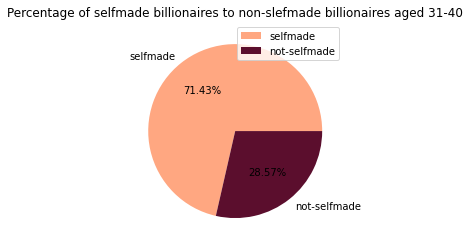

In [128]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade']
plt.pie(abo, colors = col1, labels = mylabel1,autopct = '%.2f%%')
plt.legend()
plt.title('Percentage of selfmade billionaires to non-slefmade billionaires aged 31-40')

In [129]:
# The number of male and female billionaires between the age 31 and 40
aaj =ab['gender'].value_counts()
aaj

M    76
F    15
Name: gender, dtype: int64

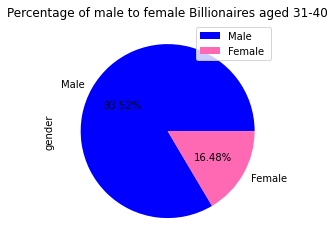

In [88]:
mylabel = ['Male',  'Female ']
col = ['blue', 'hotpink']
ab['gender'].value_counts().plot(kind= 'pie' ,autopct = '%.2f%%',colors = col , labels = mylabel, title='Percentage of male to female Billionaires aged 31-40')
plt.legend()

In [131]:
ac = pd.read_csv('forbes_41_50.csv')
ac.rename(columns = {'MyUnknownColumn': 'sn'}, inplace = True)


In [132]:
# The number of billionaires between the age 41 and 50
ac['sn'].count()

254

In [90]:
aco =ac['selfMade'].value_counts()
acj =ac['gender'].value_counts()
ach =ac['category'].value_counts()

In [91]:
# The number of selfmade and non-selfmade billionaires between the age 41 and 50
aco

True     195
False     59
Name: selfMade, dtype: int64

Text(0.5, 1.0, 'Percentage of selfmade billionaires to non-slefmade billionaires aged 41-50')

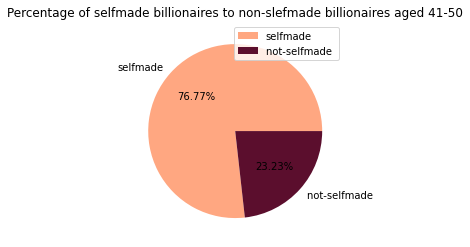

In [92]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade ']
plt.pie(aco, colors = col1, labels = mylabel1,autopct = '%.2f%%')
plt.legend()
plt.title('Percentage of selfmade billionaires to non-slefmade billionaires aged 41-50')

In [137]:
# The number of male and female billionaires between the age 41 and 50
acj

M    225
F     29
Name: gender, dtype: int64

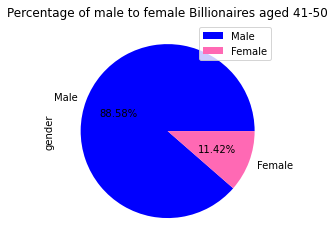

In [94]:
mylabel = ['Male',  'Female']
col = ['blue', 'hotpink']
ac['gender'].value_counts().plot(kind= 'pie',autopct = '%.2f%%', colors = col , labels = mylabel, title='Percentage of male to female Billionaires aged 41-50')
plt.legend()

In [135]:
ad = pd.read_csv('forbes_51_60.csv')
ad.rename(columns = {'MyUnknownColumn': 'sn'}, inplace = True)


In [136]:
# The number of billionaires between the age 51 and 60
ad['sn'].count()

706

In [96]:
ado =ad['selfMade'].value_counts()
adj =ad['gender'].value_counts()
adh =ad['category'].value_counts()

In [97]:
# The number of selfmade and non-selfmade billionaires between the age 51 and 60
ado

True     568
False    138
Name: selfMade, dtype: int64

Text(0.5, 1.0, 'Percentage of selfmade billionaires to non-slefmade billionaires aged 51-60')

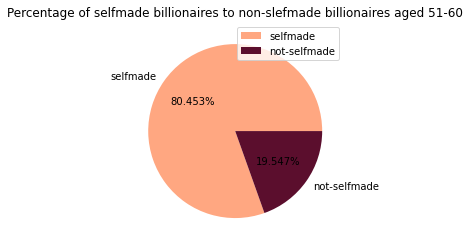

In [98]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade']
plt.pie(ado, colors = col1, labels = mylabel1,autopct = '%.3f%%')
plt.legend()
plt.title('Percentage of selfmade billionaires to non-slefmade billionaires aged 51-60')

In [99]:
#The number of male and female billionaires between the age 51 and 60
adj

M    618
F     88
Name: gender, dtype: int64

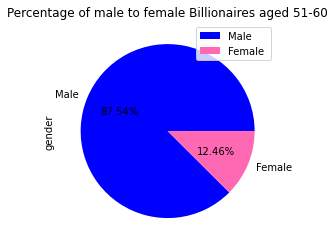

In [100]:
mylabel = ['Male',  'Female ']
col = ['blue', 'hotpink']
ad['gender'].value_counts().plot(kind= 'pie',autopct = '%.2f%%', colors = col , labels = mylabel, title='Percentage of male to female Billionaires aged 51-60')
plt.legend()

In [139]:
ae = pd.read_csv('forbes_61_70.csv')
ae.rename(columns = {'MyUnknownColumn': 'sn'}, inplace = True)



In [138]:
#The number of billionaires between the age 61 and 70
ae['sn'].count()

703

In [102]:
aeo =ae['selfMade'].value_counts()
aej =ae['gender'].value_counts()
aeh =ae['category'].value_counts()

In [103]:
#The number of selfmade and non-selfmade billionaires between the age 61 and 70
aeo

True     468
False    235
Name: selfMade, dtype: int64

Text(0.5, 1.0, 'Percentage of selfmade billionaires to non-slefmade billionaires aged 61-70')

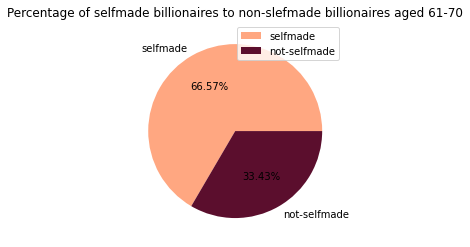

In [104]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade']
plt.pie(aeo, colors = col1, labels = mylabel1,autopct = '%.2f%%')
plt.legend()
plt.title('Percentage of selfmade billionaires to non-slefmade billionaires aged 61-70')

In [105]:
#The number of male and female billionaires between the age 61 and 70
aej

M    620
F     83
Name: gender, dtype: int64

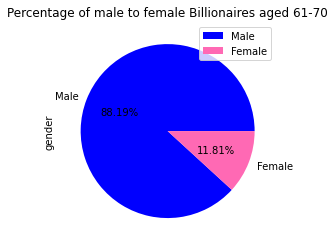

In [106]:
mylabel = ['Male',  'Female']
col = ['blue', 'hotpink']
ae['gender'].value_counts().plot(kind= 'pie',autopct = '%.2f%%', colors = col , labels = mylabel, title='Percentage of male to female Billionaires aged 61-70')
plt.legend()

In [141]:
af = pd.read_csv('forbes_71_80.csv')
af.rename(columns = {'MyUnknownColumn': 'sn'}, inplace = True)


In [140]:
#The number of billionaires between the age 71 and 80
af['sn'].count()

538

In [108]:
afo =af['selfMade'].value_counts()
afj =af['gender'].value_counts()
afh =af['category'].value_counts()/100*100

In [109]:
#The number of selfmade and non-selfmade billionaires between the age 71 and 80
afo

True     352
False    186
Name: selfMade, dtype: int64

Text(0.5, 1.0, 'Percentage of selfmade billionaires to non-slefmade billionaires aged 71-80')

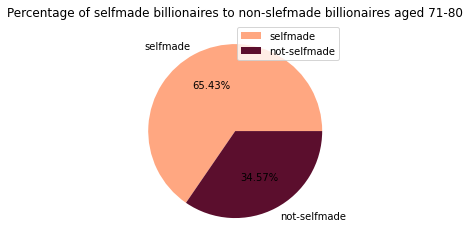

In [110]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade']
plt.pie(afo, colors = col1, labels = mylabel1,autopct = '%.2f%%')
plt.legend()
plt.title('Percentage of selfmade billionaires to non-slefmade billionaires aged 71-80')

In [111]:
#The number of male and female billionaires between the age 71 and 80
afj

M    485
F     53
Name: gender, dtype: int64

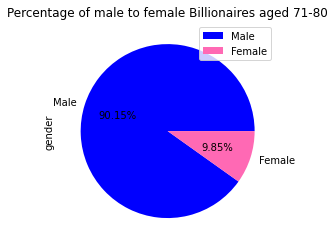

In [112]:
mylabel = ['Male',  'Female']
col = ['blue', 'hotpink']
af['gender'].value_counts().plot(kind= 'pie',autopct = '%.2f%%', colors = col , labels = mylabel, title='Percentage of male to female Billionaires aged 71-80')
plt.legend()

In [142]:
ag = pd.read_csv('forbes_81_100.csv')
ag.rename(columns = {'MyUnknownColumn': 'sn'}, inplace = True)


In [143]:
#The number of billionaires between the age 81 and 100
ag['sn'].count()

304

In [114]:
ago =ag['selfMade'].value_counts()
agj =ag['gender'].value_counts()
agh =ag['category'].value_counts()/100*100

In [144]:
#The number of selfmade and non-selfmade billionaires between the age 81 and 100
ago

True     202
False    102
Name: selfMade, dtype: int64

Text(0.5, 1.0, 'Percentage of selfmade billionaires to non-slefmade billionaires aged 81-100')

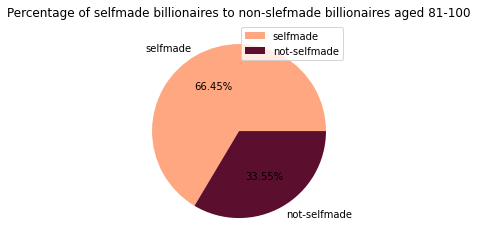

In [116]:
col1 = ['#ffa781','#5b0e2d']
mylabel1 = ['selfmade', 'not-selfmade']
plt.pie(ago, colors = col1, labels = mylabel1,autopct = '%.2f%%')
plt.legend()
plt.title('Percentage of selfmade billionaires to non-slefmade billionaires aged 81-100')

In [146]:
#The number of male and female billionaires between the age 81 and 100
agj

M    273
F     31
Name: gender, dtype: int64

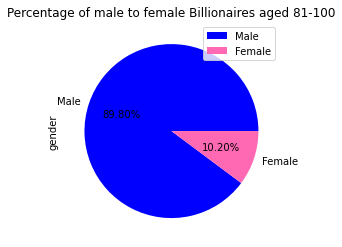

In [117]:
mylabel = ['Male',  'Female']
col = ['blue', 'hotpink']
ag['gender'].value_counts().plot(kind= 'pie',autopct = '%.2f%%', colors = col , labels = mylabel, title='Percentage of male to female Billionaires aged 81-100')
plt.legend()

After analyzing the above, it can be seen that;
1.Those between the age 50-60 have the highest number of billionaires and the highest number of selfmade billionaires.
further research must be made to see what's peculiar about that decade

2.Despite all the increase in attention to the girl child and special priviledges being made available to them in many cases
the percenatge of male to female billionaires has remained fairly constant across all the years